# Cahn - Hilliard Equation by Spectral Method

The CH Equation is :

> ### $ \frac {\partial c}{\partial t} = \tilde D [\nabla^2 g + 2 \kappa \nabla ^ 4 c]$

where g = 2Ac(1-c)(1-2c)

Applying Fourier Transformation on the equation we get :

> ### $\tilde c ^ {t + \Delta t}_{i} = \frac{(\tilde c ^ t - Dk^2 \Delta t \tilde g ^{t})} {(1 + 2\kappa k^4 \Delta t)} $



In [1]:
# ------ importing libraries ----- #
import numpy as np
from matplotlib import pyplot as plt

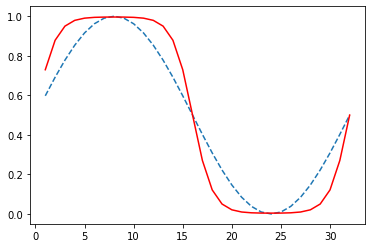

In [2]:
# ------ defining parameters ----- #

N = 32
dx = 1.0
m = 1.0

# defining concentration & composition vectors 

c = np.zeros(N) # concentration
x = np.zeros(N) # composition

for i in range (0, N):
    x[i] = i + 1
    c[i] = 0.5 * (1 + np.sin(2 * np.pi * m * (i+1) * dx /N)) # sinusoidal profile

# plotting the initial profile 
plt.plot (x,c, linestyle = "dashed")   

halfN = N/2
delk = 2 * np.pi / N
dt = 0.5

g = np.zeros(N)
ghat = np.zeros(N) # fft of g
chat = np.zeros (N) # fft of c

# ----- updation loops ----- #

for m in range (0,100): # time step loop 
    
    for j in range (0, N) : 
        g[j] = 2 * c[j] * (1 - c[j]) * (1 - 2*c[j])
    
    ghat = np.fft.fft(g)
    chat = np.fft.fft(c)
    
    for i in range (0,N) : # loop going over nodal points
        
        # implementing periodic boundary conditons
        if ( i <= halfN ):
            k = i * delk
        if ( i > halfN ):
            k = (i-N) * delk
        
        k2 = k ** 2
        k4 = k2 ** 2
        
        chat[i] = (chat[i] - dt * k2 * ghat[i]) / (1 + 2 * k4 * dt)
    
    c = np.real(np.fft.ifft(chat)) 
# plotting the final profile     
plt.plot(x,c, color = "red") 

As we can see, now we have, A rich regions becoming richer in A and B rich regions becoming richer in B. 

Then an interface is forming between A rich region and B rich region, where the composition changes continuosly. Whereas in the bulk region of A/B rich regions, it goes to 0 and 1. 

However if you change the wavelength or m, some wavelengths are going to grow and some will die down, indicating the existence of a critical wavelength. 

